In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
def notEmpty(s):
    return s!=''

In [7]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "./boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
fd

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...
5,0.02985 0.00 2.180 0 0.4580 6.4300 58...
6,0.08829 12.50 7.870 0 0.5240 6.0120 66...
7,0.14455 12.50 7.870 0 0.5240 6.1720 96...
8,0.21124 12.50 7.870 0 0.5240 5.6310 100...
9,0.17004 12.50 7.870 0 0.5240 6.0040 85...


In [17]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [30]:
# print(fd.shape)
# print(len(fd))
# print(fd[0])
data=np.empty((len(fd),14))
# print(list(enumerate(fd.values)))
for i,d in enumerate(fd.values):
#     print(i,d)
#     print('-------------------------------------')
    d=map(float,filter(notEmpty,d[0].split(' ')))
    #根据函数结果是否为真，来过滤list中的项
    data[i]=list(d)

print(data)
##分割数据
#在13列处进行分割
x,y=np.split(data,(13,),axis=1)
# print(y)
#转换格式 拉直操作
y=y.ravel()
# print(y)
print(x.shape)
print(y.shape)



[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]
(506, 13)
(506,)


In [41]:
##Pipeline
models=[
    Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures(include_bias=True)),
        ('linear',RidgeCV(alphas=np.logspace(-3,1,20),fit_intercept=True))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures(include_bias=True)),
        ('linear',LassoCV(alphas=np.logspace(-3,1,20),fit_intercept=True))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures(include_bias=True)),
        ('linear',LinearRegression(fit_intercept=True))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('poly', PolynomialFeatures(include_bias=True)),
        ('linear', ElasticNetCV(alphas=np.logspace(0,1,10),l1_ratio=[.1,.5,.7,.9,.95,1],fit_intercept=True))
    ])
]

In [35]:
# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
['#ff0000', '#aa0055', '#5500aa', '#0000ff']


E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 

<Figure size 864x432 with 0 Axes>

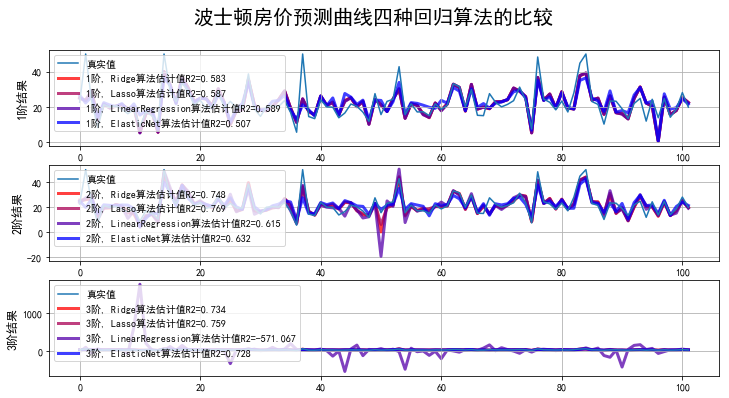

In [46]:
#模型训练
titles=['Ridge','Lasso','LinearRegression','ElasticNet']
plt.figure(figsize=(12,6),facecolor='w') #创建绘图窗口，设置大小，设置颜色
# for t in range(4):
t=np.arange(len(X_test))
print(t)
N=4
d_pool=np.arange(1,N,1)
m=d_pool.size
clrs=[]
for c in np.linspace(16711680,255,4):
    clrs.append('#%06x'%int(c))
print(clrs)
line_width=3

plt.figure(figsize=(12,6),facecolor='w') #创建绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)
    plt.plot(t, Y_test, '-', label=u'真实值', ms=10, zorder=N)
    for k in range(4):
        models[k].set_params(poly__degree=d) ## 设置多项式的阶乘
        models[k].fit(X_train, Y_train) # 模型训练
#         lin = models[k].get_params()['linear']
#         output = u'%d阶，系数为：' % d
#         print (output, lin.coef_.ravel())

        # 模型结果预测
        y_hat = models[k].predict(X_test)
        # 计算评估值
        s = models[k].score(X_test, Y_test)

        # 画图
        z = N - 1 if (d == 2) else 0
        label = u'%d阶, %s算法估计值R2=%.3f' % (d,titles[k],s)
        plt.plot(t, y_hat, color=clrs[k], lw=line_width, alpha=0.75, label=label, zorder=z)
        plt.legend(loc = 'upper left')
        #     #
#     label = u'%d阶, %s算法估计值R2=%.3f' % (d,titles[1],s)
#     plt.plot(t, y_hat, color=clrs[1], lw=line_width, alpha=0.75, label=label, zorder=z)
#     #
#     label = u'%d阶, %s算法估计值R2=%.3f' % (d,titles[2],s)
#     plt.plot(t, y_hat, color=clrs[2], lw=line_width, alpha=0.75, label=label, zorder=z)
#     #
#     label = u'%d阶, %s算法估计值R2=%.3f' % (d,titles[3],s)
#     plt.plot(t, y_hat, color=clrs[3], lw=line_width, alpha=0.75, label=label, zorder=z)
    
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"波士顿房价预测曲线四种回归算法的比较", fontsize=20)
plt.grid(b=True)
plt.show()    
    